# Import Library

In [36]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import plot_tree
import warnings
warnings.filterwarnings('ignore')


# MEMUAT DAN EKSPLORASI DATA

In [37]:
def muat_data(nama_file):
    try:
        data = pd.read_csv(nama_file)
        print(f"Data berhasil dimuat dari {nama_file}")
        print(f"Jumlah baris: {len(data)}")
        print(f"Jumlah kolom: {len(data.columns)}")
        return data
    except Exception as e:
        print(f"✗ Error saat memuat data: {e}")
        return None

In [38]:
data = muat_data('data.csv')

Data berhasil dimuat dari data.csv
Jumlah baris: 17
Jumlah kolom: 9


In [39]:
data.head()

,Name,Body Temperature,Skin Cover,Gives Birth,Aquatic Creature,Aerial Creature,Has Legs,Hibernates,Class Label
0,human,warm-blooded,hair,yes,no,no,yes,no,mammal
1,python,cold-blooded,scales,no,no,no,no,yes,reptile
2,salmon,cold-blooded,scales,no,yes,no,no,no,fish
3,whale,warm-blooded,hair,yes,yes,no,no,no,mammal
4,frog,cold-blooded,none,no,semi,no,yes,yes,amphibian


In [40]:
print("Informasi Dataset:")
print(data.info())

Informasi Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Name              17 non-null     object
 1   Body Temperature  15 non-null     object
 2   Skin Cover        15 non-null     object
 3   Gives Birth       15 non-null     object
 4   Aquatic Creature  15 non-null     object
 5   Aerial Creature   15 non-null     object
 6   Has Legs          15 non-null     object
 7   Hibernates        15 non-null     object
 8   Class Label       15 non-null     object
dtypes: object(9)
memory usage: 1.3+ KB
None


### Informasi Dataset

- Dataset ini terdiri dari **17 entri (baris)** dan **9 kolom (fitur)**.
- Tipe data untuk semua kolom adalah `object` (tipe string atau kategorikal).
- Sebanyak **15 entri lengkap**, sementara **2 entri memiliki nilai kosong (missing value)** pada beberapa kolom.

#### Rincian Kolom:
| No | Nama Kolom          | Jumlah Data Tidak Kosong | Deskripsi                                   |
|----|---------------------|--------------------------|----------------------------------------------|
| 0  | Name                | 17                       | Nama hewan                                   |
| 1  | Body Temperature    | 15                       | Suhu tubuh (contoh: berdarah panas/dingin)  |
| 2  | Skin Cover          | 15                       | Jenis penutup kulit (misal: bulu, sisik)    |
| 3  | Gives Birth         | 15                       | Apakah melahirkan anak                      |
| 4  | Aquatic Creature    | 15                       | Apakah hidup di air                         |
| 5  | Aerial Creature     | 15                       | Apakah bisa terbang                         |
| 6  | Has Legs            | 15                       | Apakah memiliki kaki                        |
| 7  | Hibernates          | 15                       | Apakah mengalami hibernasi                  |
| 8  | Class Label         | 15                       | Kelas hewan (target klasifikasi)            |

- Kolom `Name` tidak mengandung nilai kosong.
- Kolom `Class Label` merupakan **label target klasifikasi**.
- Perlu dilakukan **penanganan nilai kosong (missing value)** sebelum melatih model.


In [41]:
print("\nNilai yang Hilang:")
nilai_hilang = data.isnull().sum()
print(nilai_hilang[nilai_hilang > 0])


Nilai yang Hilang:
Body Temperature    2
Skin Cover          2
Gives Birth         2
Aquatic Creature    2
Aerial Creature     2
Has Legs            2
Hibernates          2
Class Label         2
dtype: int64



Distribusi Kelas Target:


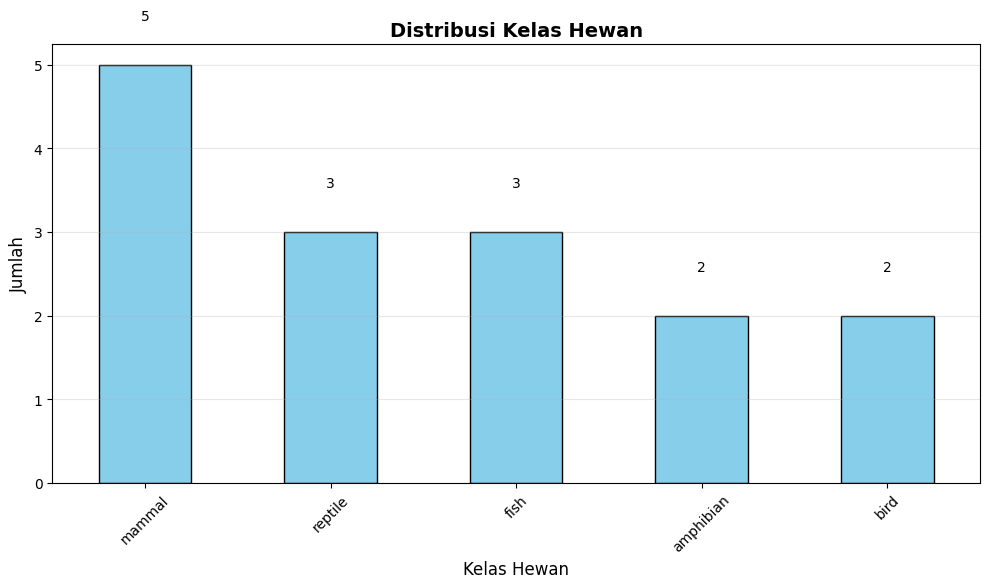

In [42]:
print("\nDistribusi Kelas Target:")
if 'Class Label' in data.columns:
    distribusi = data['Class Label'].value_counts()
    plt.figure(figsize=(10, 6))
    ax = distribusi.plot(kind='bar', color='skyblue', edgecolor='black')

    plt.title('Distribusi Kelas Hewan', fontsize=14, fontweight='bold')
    plt.xlabel('Kelas Hewan', fontsize=12)
    plt.ylabel('Jumlah', fontsize=12)
    plt.xticks(rotation=45)
    plt.grid(axis='y', alpha=0.3)

    
    for i, jumlah in enumerate(distribusi):
        plt.text(i, jumlah + 0.5, str(jumlah), ha='center', va='bottom', fontsize=10)

    plt.tight_layout()
    plt.show()

In [44]:
# Membersihkan dan memproses data
print("\n" + "="*60)
print("PEMBERSIHAN DATA")
print("="*60)
    

data_bersih = data.copy()
    
# Hapus baris dengan nilai kosong di kolom Class Label
data_awal = len(data_bersih)
data_bersih = data_bersih.dropna(subset=['Class Label'])
print(f"Menghapus baris dengan kelas kosong: {data_awal - len(data_bersih)} baris dihapus")
    
# Hapus baris dengan terlalu banyak nilai kosong
ambang_batas = len(data_bersih.columns) * 0.5 
data_bersih = data_bersih.dropna(thresh=ambang_batas)
print(f"✓ Data setelah pembersihan: {len(data_bersih)} baris")
    
# Isi nilai kosong dengan modus untuk kolom kategorikal
for kolom in data_bersih.columns:
    if kolom != 'Name' and kolom != 'Class Label':
        if data_bersih[kolom].isnull().any():
            modus = data_bersih[kolom].mode()[0] if not data_bersih[kolom].mode().empty else 'unknown'
            data_bersih[kolom].fillna(modus, inplace=True)
            print(f"✓ Mengisi nilai kosong di kolom '{kolom}' dengan '{modus}'")
    


PEMBERSIHAN DATA
Menghapus baris dengan kelas kosong: 2 baris dihapus
✓ Data setelah pembersihan: 15 baris


In [45]:
data_bersih

,Name,Body Temperature,Skin Cover,Gives Birth,Aquatic Creature,Aerial Creature,Has Legs,Hibernates,Class Label
0,human,warm-blooded,hair,yes,no,no,yes,no,mammal
1,python,cold-blooded,scales,no,no,no,no,yes,reptile
2,salmon,cold-blooded,scales,no,yes,no,no,no,fish
3,whale,warm-blooded,hair,yes,yes,no,no,no,mammal
4,frog,cold-blooded,none,no,semi,no,yes,yes,amphibian
5,komodo,cold-blooded,scales,no,no,no,yes,no,reptile
7,bat,warm-blooded,hair,yes,no,yes,yes,yes,mammal
8,pigeon,warm-blooded,feathers,no,no,yes,yes,no,bird
9,cat,warm-blooded,fur,yes,no,no,yes,no,mammal
10,leopard,cold-blooded,scales,yes,yes,no,no,no,fish


# PREPROCESSING FITUR

In [46]:
def persiapkan_fitur(data):
    print("\n" + "="*60)
    print("PERSIAPAN FITUR")
    print("="*60)
    
    # Pilih kolom fitur
    kolom_fitur = [col for col in data.columns if col not in ['Name', 'Class Label']]
    
    # Encode fitur kategorikal
    X_encoded = data[kolom_fitur].copy()
    encoder_fitur = {}
    
    for kolom in kolom_fitur:
        if X_encoded[kolom].dtype == 'object':
            encoder_fitur[kolom] = LabelEncoder()
            X_encoded[kolom] = encoder_fitur[kolom].fit_transform(X_encoded[kolom])
            print(f"✓ Encode kolom '{kolom}': {list(encoder_fitur[kolom].classes_)}")
    
    # Encode target
    encoder_target = LabelEncoder()
    y_encoded = encoder_target.fit_transform(data['Class Label'])
    print(f"✓ Encode kelas target: {list(encoder_target.classes_)}")
    
    X = X_encoded
    y = y_encoded
    
    print(f"Bentuk fitur final: {X.shape}")
    print(f"Jumlah kelas unik: {len(np.unique(y))}")
    
    return X, y, encoder_fitur, encoder_target

In [47]:
def bagi_data(X, y, ukuran_test=0.2, random_state=42):
    print("\n" + "="*60)
    print("PEMBAGIAN DATA")
    print("="*60)
    
    jumlah_kelas = len(np.unique(y))
    ukuran_test_abs = int(len(y) * ukuran_test)
    
    if ukuran_test_abs < jumlah_kelas:
        ukuran_test = jumlah_kelas / len(y) + 0.05 
        print(f"Ukuran test terlalu kecil untuk {jumlah_kelas} kelas — disesuaikan ke {ukuran_test:.2f}")

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=ukuran_test, random_state=random_state,
        stratify=y if jumlah_kelas > 1 else None
    )
    
    print(f"Data training: {len(X_train)} sampel")
    print(f"Data testing: {len(X_test)} sampel")
    print(f"Rasio pembagian: {int((1-ukuran_test)*100)}% training, {int(ukuran_test*100)}% testing")
    
    return X_train, X_test, y_train, y_test


In [48]:
# Persiapkan fitur dan target
X, y, encoder_fitur, encoder_target = persiapkan_fitur(data_bersih)


PERSIAPAN FITUR
✓ Encode kolom 'Body Temperature': ['cold-blooded', 'warm-blooded']
✓ Encode kolom 'Skin Cover': ['feathers', 'fur', 'hair', 'none', 'quills', 'scales']
✓ Encode kolom 'Gives Birth': ['no', 'yes']
✓ Encode kolom 'Aquatic Creature': ['no', 'semi', 'yes']
✓ Encode kolom 'Aerial Creature': ['no', 'yes']
✓ Encode kolom 'Has Legs': ['no', 'yes']
✓ Encode kolom 'Hibernates': ['no', 'yes']
✓ Encode kelas target: ['amphibian', 'bird', 'fish', 'mammal', 'reptile']
Bentuk fitur final: (15, 7)
Jumlah kelas unik: 5


In [49]:
# Bagi data
X_train, X_test, y_train, y_test = bagi_data(X, y)


PEMBAGIAN DATA
Ukuran test terlalu kecil untuk 5 kelas — disesuaikan ke 0.38
Data training: 9 sampel
Data testing: 6 sampel
Rasio pembagian: 61% training, 38% testing


# PELATIHAN MODEL

In [50]:
def model_dt(X_train, y_train, X_test, y_test, kedalaman_max=None, random_state=42):
    print("\n" + "="*60)
    print("PELATIHAN MODEL DECISION TREE")
    print("="*60)
    
    model_pohon_keputusan = DecisionTreeClassifier(
        max_depth=kedalaman_max, 
        random_state=random_state,
        criterion='gini'
    )
    
    model_pohon_keputusan.fit(X_train, y_train)
    print("MODEL DECISION TREE BERHASIL DILATIH")
    
    # Evaluasi pada data training
    prediksi_train = model_pohon_keputusan.predict(X_train)
    akurasi_train = accuracy_score(y_train, prediksi_train)
    print(f"✓ Akurasi pada data training: {akurasi_train:.4f}")
    
    # Evaluasi pada data testing
    prediksi_test = model_pohon_keputusan.predict(X_test)
    akurasi_test = accuracy_score(y_test, prediksi_test)
    print(f"✓ Akurasi pada data testing: {akurasi_test:.4f}")
    
    return model_pohon_keputusan

In [51]:
# Latih model
model_dt = model_dt(X_train, y_train, X_test, y_test)
    


PELATIHAN MODEL DECISION TREE
MODEL DECISION TREE BERHASIL DILATIH
✓ Akurasi pada data training: 1.0000
✓ Akurasi pada data testing: 0.6667


# EVALUASI MODEL

In [52]:
def evaluasi_model(model_pohon_keputusan, X_test, y_test, encoder_target):
    print("\n" + "="*80)
    print("EVALUASI MODEL")
    print("="*80)
    
    # Evaluasi DT
    print("\n1. DECISION TREE:")
    print("-" * 40)
    prediksi_dt = model_pohon_keputusan.predict(X_test)
    
    print("Classification Report:")
    print(classification_report(
        y_test, prediksi_dt, 
        target_names=encoder_target.classes_
    ))
    
    
    
    #  akurasi
    akurasi_dt = accuracy_score(y_test, prediksi_dt)
    
    print(f"\n3. PERBANDINGAN AKURASI:")
    print("-" * 40)
    print(f"DECISION TREE: {akurasi_dt:.4f}")
    
    return akurasi_dt


In [54]:
# Evaluasi model
akurasi_dt = evaluasi_model(model_dt, X_test, y_test, encoder_target)


EVALUASI MODEL

1. DECISION TREE:
----------------------------------------
Classification Report:
              precision    recall  f1-score   support

   amphibian       1.00      1.00      1.00         1
        bird       1.00      1.00      1.00         1
        fish       0.50      1.00      0.67         1
      mammal       1.00      0.50      0.67         2
     reptile       0.00      0.00      0.00         1

    accuracy                           0.67         6
   macro avg       0.70      0.70      0.67         6
weighted avg       0.75      0.67      0.67         6


3. PERBANDINGAN AKURASI:
----------------------------------------
DECISION TREE: 0.6667


# VISUALISASI

In [61]:
def tampilkan_confusion_matrix(model_pohon_keputusan, X_test, y_test, encoder_target):
    fig, ax = plt.subplots(figsize=(8, 6))  # Hanya satu axes

    prediksi_dt = model_pohon_keputusan.predict(X_test)
    cm_dt = confusion_matrix(y_test, prediksi_dt)
    akurasi_dt = accuracy_score(y_test, prediksi_dt)

    sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Blues',
                xticklabels=encoder_target.classes_,
                yticklabels=encoder_target.classes_, ax=ax)
    ax.set_title(f'Confusion Matrix - Decision Tree\nAkurasi: {akurasi_dt:.2f}')
    ax.set_xlabel('Prediksi')
    ax.set_ylabel('Aktual')

    # Teks interpretasi di bawah
    fig.text(0.5, -0.1, (
        f"Interpretasi:\n"
        f"Decision Tree mengklasifikasi dengan akurasi {akurasi_dt:.2f}.\n"
        f"Nilai diagonal menunjukkan prediksi benar.\n"
        f"Nilai non-diagonal menunjukkan prediksi salah terhadap kelas tertentu."
    ), ha='center', fontsize=10)

    plt.tight_layout()
    plt.show()



def tampilkan_pohon_keputusan(model_pohon_keputusan, X, encoder_target):
    plt.figure(figsize=(20, 10))
    plot_tree(model_pohon_keputusan, 
             feature_names=X.columns,
             class_names=encoder_target.classes_,
             filled=True, rounded=True, fontsize=10)
    plt.title('Visualisasi Decision Tree', fontsize=16, fontweight='bold')
    plt.show()

def tampilkan_kepentingan_fitur(model_pohon_keputusan, X):
    fig, ax = plt.subplots(figsize=(10, 6))

    kepentingan_dt = model_pohon_keputusan.feature_importances_
    nama_fitur = X.columns

    indices_dt = np.argsort(kepentingan_dt)[::-1]
    fitur_teratas = nama_fitur[indices_dt[0]]

    ax.bar(range(len(kepentingan_dt)), kepentingan_dt[indices_dt])
    ax.set_title('Kepentingan Fitur - Decision Tree')
    ax.set_xlabel('Fitur')
    ax.set_ylabel('Kepentingan')
    ax.set_xticks(range(len(kepentingan_dt)))
    ax.set_xticklabels([nama_fitur[i] for i in indices_dt], rotation=45)

   
    fig.text(0.5, -0.1, (
        f"Interpretasi:\n"
        f"Fitur '{fitur_teratas}' memiliki kontribusi paling besar dalam pengambilan keputusan pohon.\n"
        f"Semakin tinggi batang, semakin penting fitur tersebut dalam klasifikasi."
    ), ha='center', fontsize=10)

    plt.tight_layout()
    plt.show()


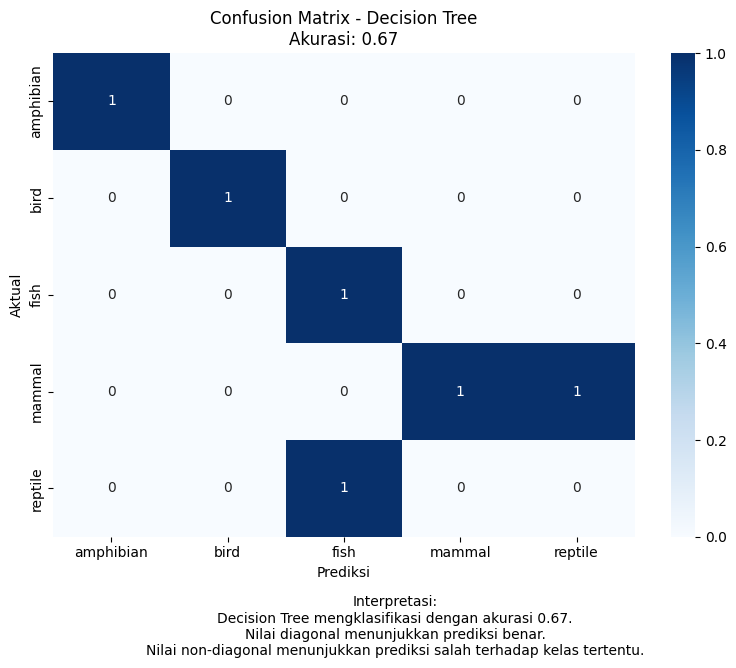

In [58]:
tampilkan_confusion_matrix(
    model_pohon_keputusan=model_dt,
    X_test=X_test,
    y_test=y_test,
    encoder_target=encoder_target
)


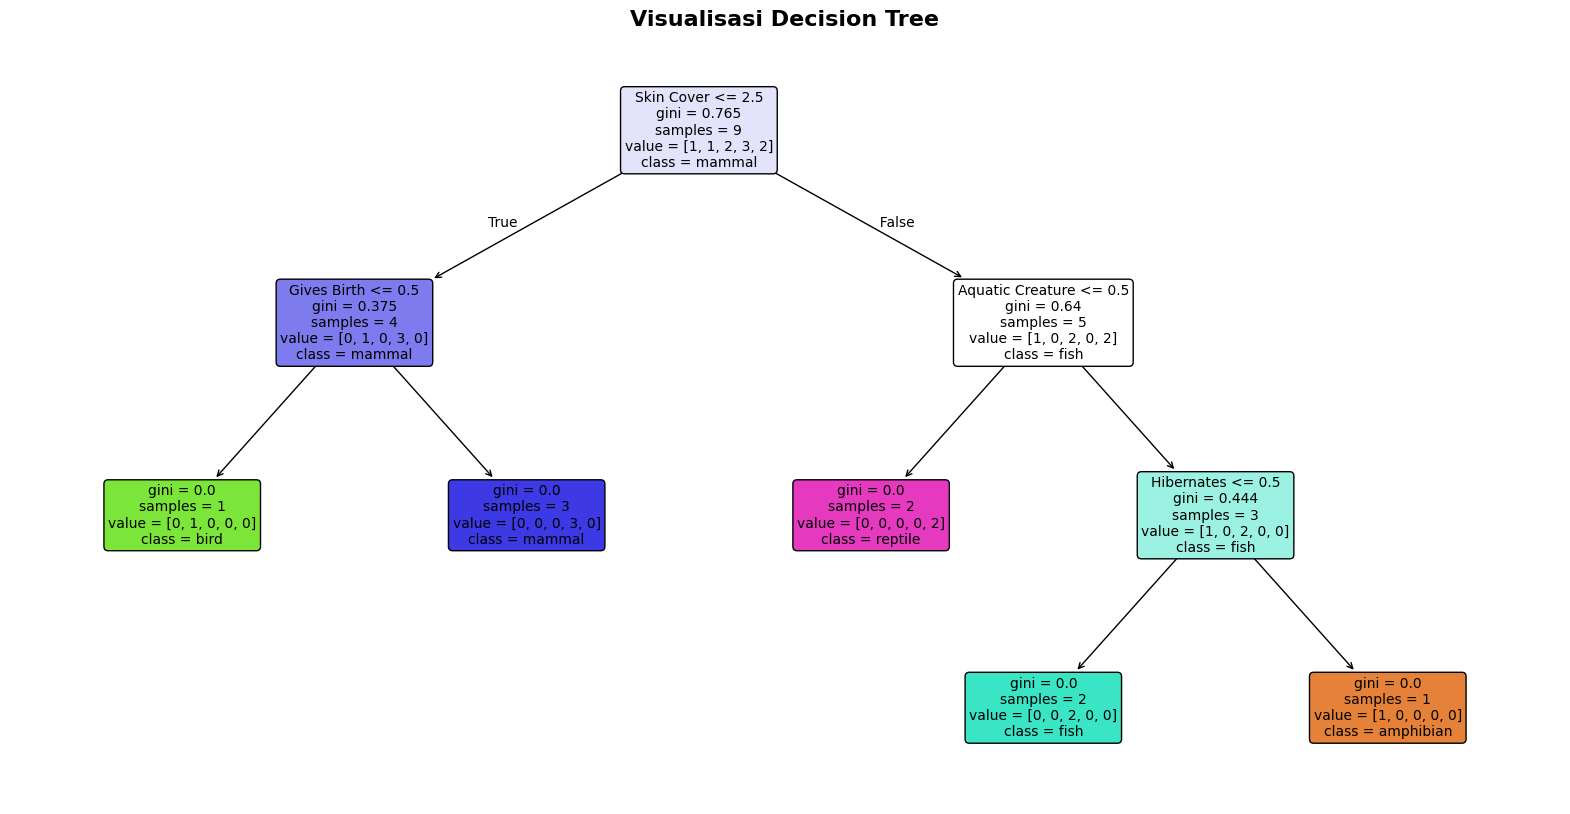

In [62]:
tampilkan_pohon_keputusan(model_dt, X, encoder_target)

# insight
| Kondisi                                                          | Prediksi Kelas |
| ---------------------------------------------------------------- | -------------- |
| Skin Cover ≤ 2.5 AND Gives Birth > 0.5                           | Mammal         |
| Skin Cover ≤ 2.5 AND Gives Birth ≤ 0.5                           | Bird           |
| Skin Cover > 2.5 AND Aquatic Creature ≤ 0.5                      | Reptile        |
| Skin Cover > 2.5 AND Aquatic Creature > 0.5 AND Hibernates ≤ 0.5 | Fish           |
| Skin Cover > 2.5 AND Aquatic Creature > 0.5 AND Hibernates > 0.5 | Amphibian      |


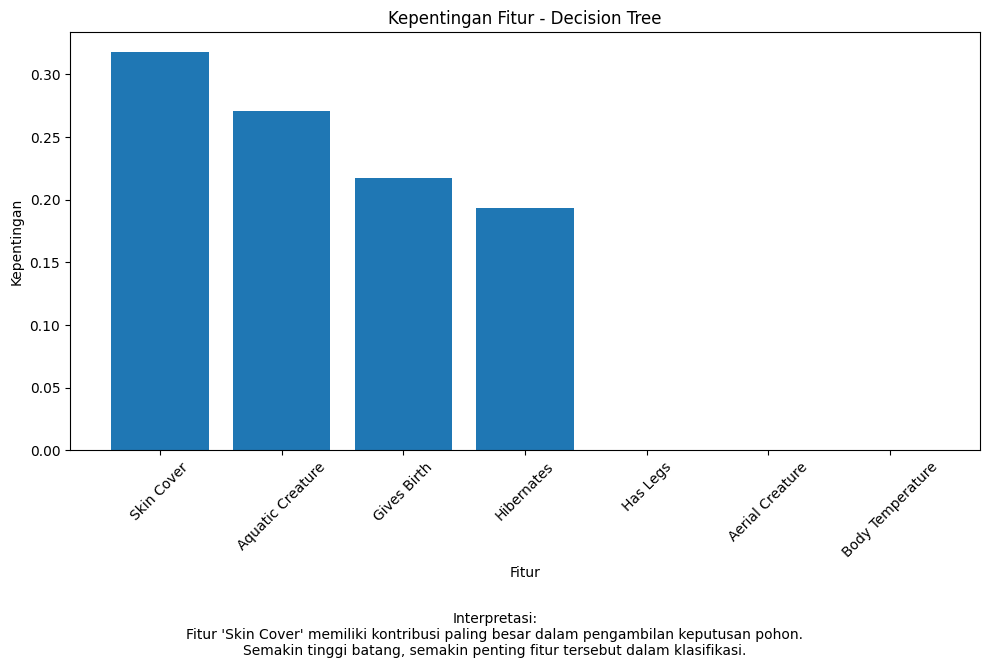

In [63]:
tampilkan_kepentingan_fitur(model_dt, X)

# INFERENSI

In [65]:
def prediksi_hewan_baru(data_hewan, model_pohon_keputusan, X, encoder_fitur, encoder_target):
    print("\n" + "="*60)
    print("PREDIKSI HEWAN BARU")
    print("="*60)
    
    # Konversi data input
    data_input = {}
    for kolom, nilai in data_hewan.items():
        if kolom in encoder_fitur:
            try:
                data_input[kolom] = encoder_fitur[kolom].transform([nilai])[0]
            except ValueError:
                print(f"Nilai '{nilai}' tidak dikenal untuk kolom '{kolom}'")
                data_input[kolom] = 0
        else:
            data_input[kolom] = nilai
    
    # Buat dataframe untuk prediksi
    df_input = pd.DataFrame([data_input])
    df_input = df_input.reindex(columns=X.columns, fill_value=0)
    
    # Prediksi dengan  model
    prediksi_dt = model_pohon_keputusan.predict(df_input)[0]
    
    # Probabilitas prediksi
    prob_dt = model_pohon_keputusan.predict_proba(df_input)[0]
    
    # Decode hasil prediksi
    kelas_dt = encoder_target.inverse_transform([prediksi_dt])[0]
    
    print(f"Data input: {data_hewan}")
    print(f"\nPrediksi Pohon Keputusan: {kelas_dt}")
    
    print(f"\nProbabilitas Pohon Keputusan:")
    for i, kelas in enumerate(encoder_target.classes_):
        print(f"  {kelas}: {prob_dt[i]:.4f}")
        
    
    return kelas_dt

In [66]:
# prediksi hewan baru
print("\n" + "="*60)
print("CONTOH PREDIKSI HEWAN BARU")
print("="*60)
    
# Kucing
hewan_kucing = {
        'Body Temperature': 'warm-blooded',
        'Skin Cover': 'fur',
        'Gives Birth': 'yes',
        'Aquatic Creature': 'no',
        'Aerial Creature': 'no',
        'Has Legs': 'yes',
        'Hibernates': 'no'
    }
prediksi_hewan_baru(hewan_kucing, model_dt, X, encoder_fitur, encoder_target)


CONTOH PREDIKSI HEWAN BARU

PREDIKSI HEWAN BARU
Data input: {'Body Temperature': 'warm-blooded', 'Skin Cover': 'fur', 'Gives Birth': 'yes', 'Aquatic Creature': 'no', 'Aerial Creature': 'no', 'Has Legs': 'yes', 'Hibernates': 'no'}

Prediksi Pohon Keputusan: mammal

Probabilitas Pohon Keputusan:
  amphibian: 0.0000
  bird: 0.0000
  fish: 0.0000
  mammal: 1.0000
  reptile: 0.0000


'mammal'

In [67]:
#Burung
hewan_burung = {
        'Body Temperature': 'warm-blooded',
        'Skin Cover': 'feathers',
        'Gives Birth': 'no',
        'Aquatic Creature': 'no',
        'Aerial Creature': 'yes',
        'Has Legs': 'yes',
        'Hibernates': 'no'}
prediksi_hewan_baru(hewan_burung, model_dt, X, encoder_fitur, encoder_target)


PREDIKSI HEWAN BARU
Data input: {'Body Temperature': 'warm-blooded', 'Skin Cover': 'feathers', 'Gives Birth': 'no', 'Aquatic Creature': 'no', 'Aerial Creature': 'yes', 'Has Legs': 'yes', 'Hibernates': 'no'}

Prediksi Pohon Keputusan: bird

Probabilitas Pohon Keputusan:
  amphibian: 0.0000
  bird: 1.0000
  fish: 0.0000
  mammal: 0.0000
  reptile: 0.0000


'bird'